## Complex networks 2025 - Fall
### Practice 02 - 2025.10.07.

Percolation, Barabasi-Albert model, centrality measures

## Task 1

Reproduce the plots from lecture 3 slide 12 for and Erdős-Rényi graph with fixed $N$:
 - $P_\infty(\langle k \rangle)$
 - $\langle S \rangle (\langle k \rangle)$

Determine the percolation threshold $p_c$.\
Try different values of $N$ and determine what $N$ was used in the lecture slides.

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

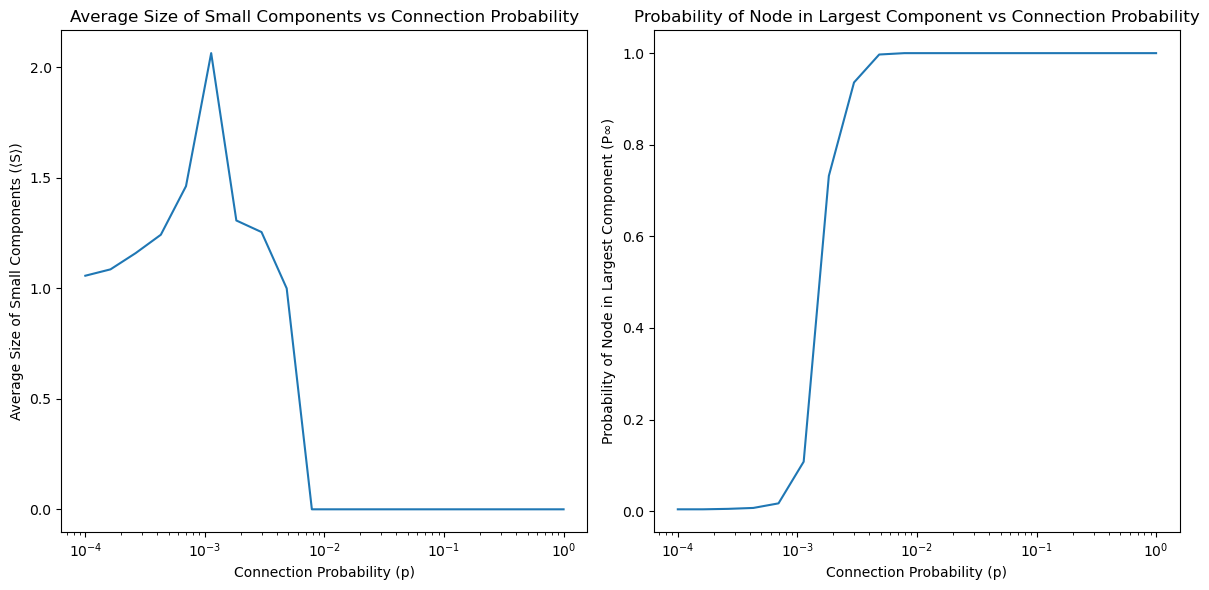

In [5]:
ps = np.logspace(-4, 0, 20) 
N = 1000

avg_Ss = []
P_infs = []

for p in ps:
    ER = nx.erdos_renyi_graph(N, p)
    #nx.connected_components gives back a set of components
    components = list(nx.connected_components(ER))
    comp_sizes = sorted([len(c) for c in components])
    biggest_comp = comp_sizes[-1]
    avg_S = np.mean(comp_sizes[:-1]) if len(comp_sizes) > 1 else 0
    P_inf = biggest_comp / ER.number_of_nodes()
    avg_Ss.append(avg_S)
    P_infs.append(P_inf)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.plot(ps, avg_Ss)
ax1.set_xscale('log')
ax1.set_xlabel('Connection Probability (p)')
ax1.set_ylabel('Average Size of Small Components (⟨S⟩)')
ax1.set_title('Average Size of Small Components vs Connection Probability')

ax2.plot(ps, P_infs)
ax2.set_xscale('log')
ax2.set_xlabel('Connection Probability (p)')
ax2.set_ylabel('Probability of Node in Largest Component (P∞)')
ax2.set_title('Probability of Node in Largest Component vs Connection Probability')

plt.tight_layout()
plt.show()

## Example: How to get the degree distribution of a power-law distributed variable?

Text(0, 0.5, 'P(k)')

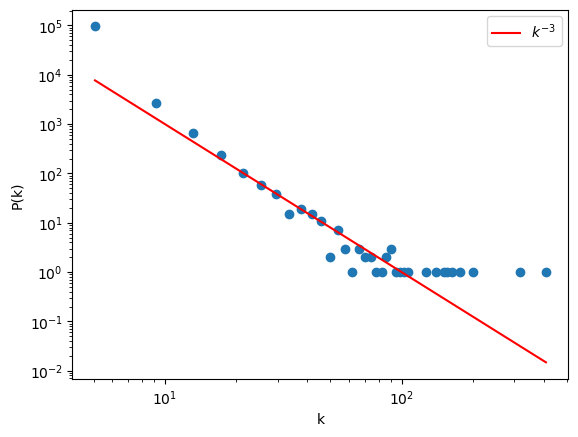

In [16]:
k = np.random.rand(int(1e5))
alpha = 3
power_law = (1-k)**(1/(-alpha+1))

h = np.histogram(power_law, bins=100)
plt.loglog(h[1][1:], h[0], marker='o', linestyle='none')
plt.loglog(h[1][1:], 1e6*h[1][1:]**(-alpha), color='r', label=r'$k^{-%d}$'%alpha)
plt.legend()
plt.xlabel('k')
plt.ylabel('P(k)')

## Task 2

Simulate the Barabási-Albert model and plot the degree distribution for different values of $m$. Plot with equal histogram as above and also with logarithmic binning (check `density=True` option) and the cumulative distribution. \
Fit a power-law (line on loglog) to the tail of the distribution and determine the exponent from both the logarithmic scale and the cumulative distribution.

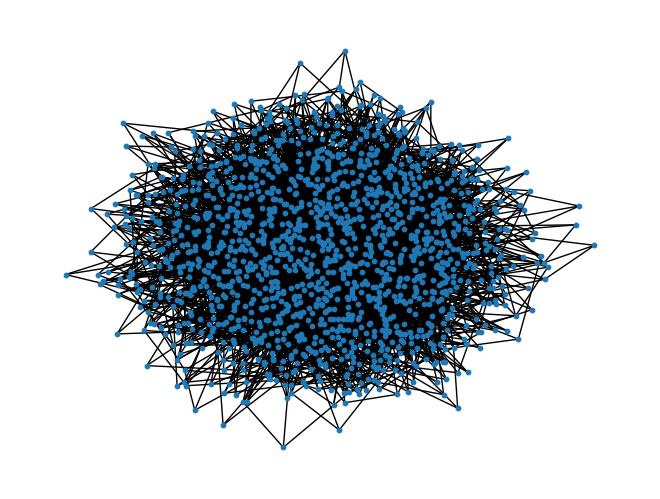

[3, 3, 3, 3, 3, 3]
[57, 63, 80, 94, 109, 115]


In [40]:
G_ba = nx.barabasi_albert_graph(1500, 3)
nx.draw(G_ba, node_size=10)
plt.show()
print(sorted(list(dict(G_ba.degree()).values()))[:6])  # Minimum degrees
print(sorted(list(dict(G_ba.degree()).values()))[-6:])  # Maximum degrees

m=2 -> min_deg=2, max_deg=50


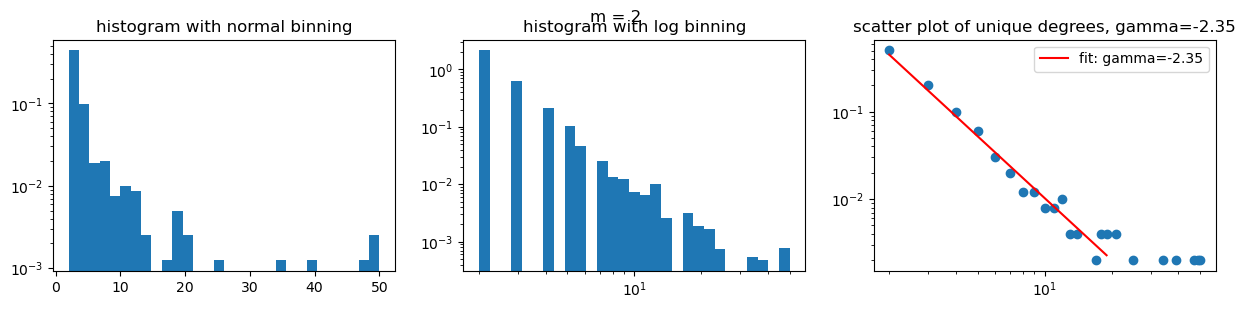

m=3 -> min_deg=3, max_deg=60


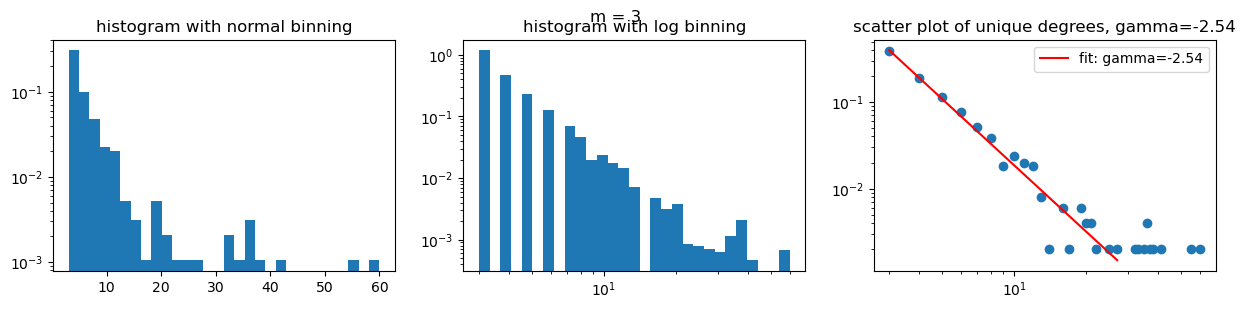

m=4 -> min_deg=4, max_deg=84


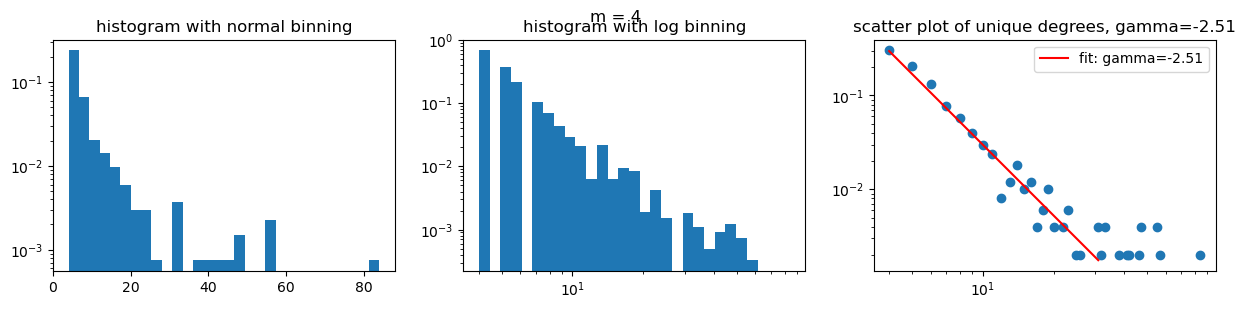

m=5 -> min_deg=5, max_deg=82


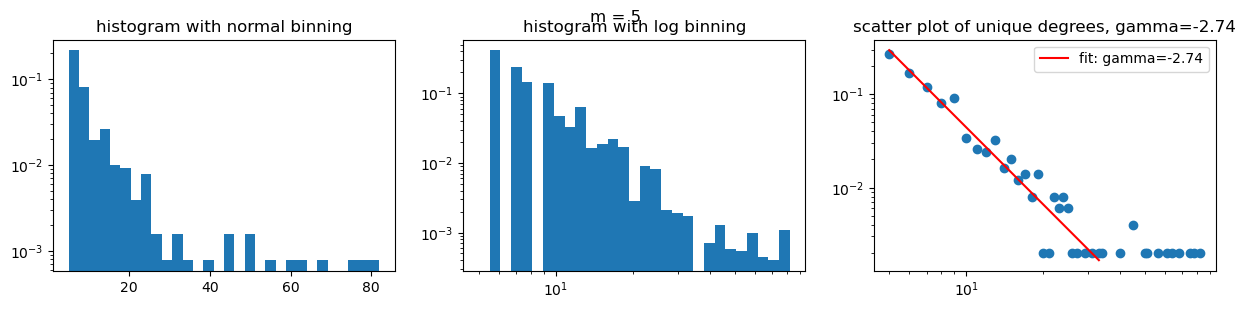

m=6 -> min_deg=6, max_deg=102


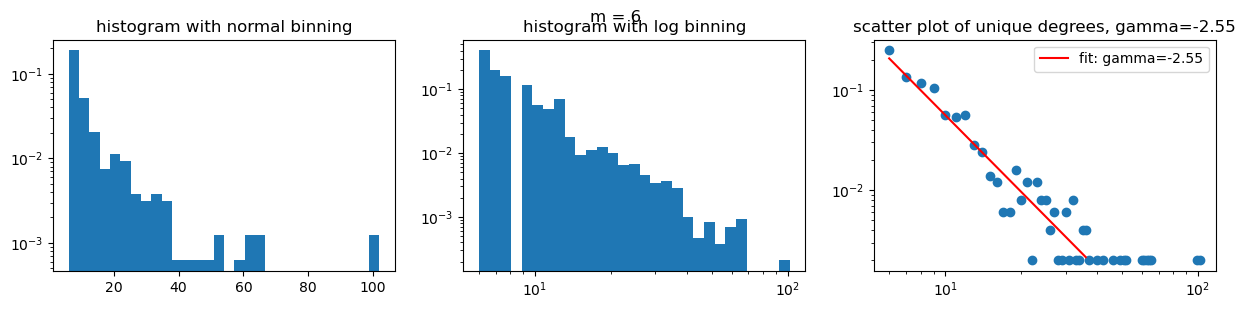

m=7 -> min_deg=7, max_deg=95


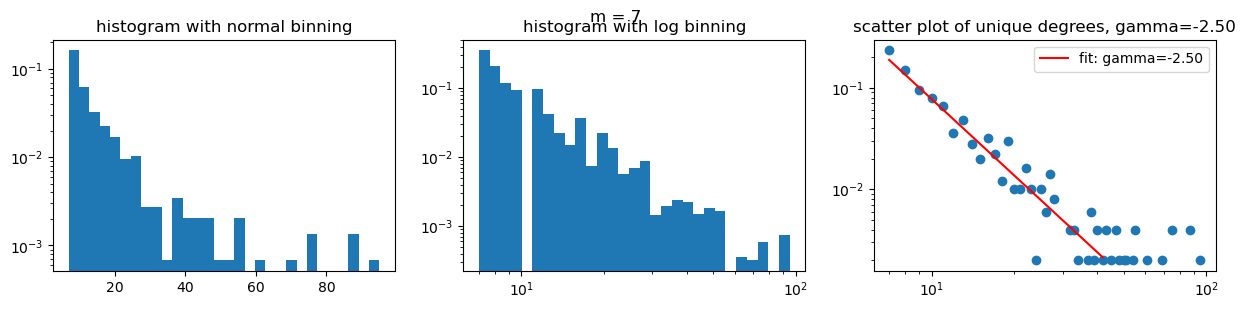

m=8 -> min_deg=8, max_deg=128


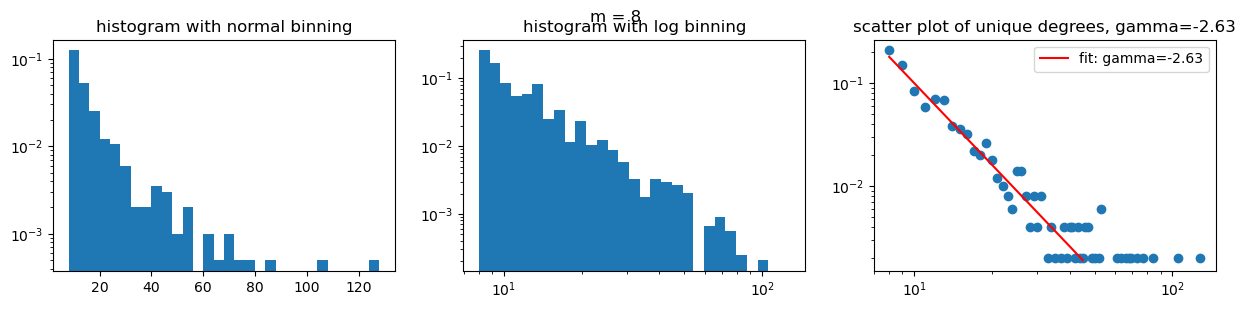

In [43]:
n = 500

for m in range(2, 9):
    G_ba = nx.barabasi_albert_graph(n, m)
    degrees = sorted(list(dict(G_ba.degree()).values()))
    min_deg = degrees[0]
    max_deg = degrees[-1]
    print(f"{m=} -> {min_deg=}, {max_deg=}")

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 3))
    fig.suptitle(f"m = {m}")

    ax1.hist(degrees, bins=30, density=True)
    ax1.set_yscale('log')
    ax1.set_title('histogram with normal binning')

    log_bins = np.logspace(np.log10(min_deg), np.log10(max_deg), 30)
    ax2.hist(degrees, bins=log_bins, density=True)
    ax2.set_xscale('log')
    ax2.set_yscale('log')
    ax2.set_title('histogram with log binning')

    unique_degrees, counts = np.unique(degrees, return_counts=True)
    last_idx = int(0.7 * len(unique_degrees))  # Use only first 70% of data for fitting
    ind_ps = counts / n
    log_x = np.log10(unique_degrees[:last_idx])
    log_y = np.log10(ind_ps[:last_idx])
    gamma, log_c = np.polyfit(log_x, log_y, 1)
    x_fit = np.linspace(log_x[0], log_x[-1], 100)
    y_fit = gamma * x_fit + log_c

    ax3.scatter(unique_degrees, ind_ps)
    ax3.plot(10**x_fit, 10**y_fit, color='r', label=f'fit: gamma={gamma:.2f}')
    ax3.legend()
    ax3.set_xscale('log')
    ax3.set_yscale('log')
    ax3.set_title(f'scatter plot of unique degrees, gamma={gamma:.2f}')

    plt.show()
    

## Task 3

Calulate different centrality measures (degree, betweenness, closeness, eigenvector, harmonic) for a generated network of your choice (e.g. Barabási-Albert, Erdős-Rényi, Watts-Strogatz).\
Plot the graphs with colors corresponding to the centrality values and compare the different measures.

https://networkx.org/documentation/stable/reference/algorithms/centrality.html

In [47]:
def print_centrality_measures(G):
    degree_c = list(nx.degree_centrality(G).values())
    print(f"-> degree centrality: {np.mean(degree_c):.3f}, max: {np.max(degree_c):.3f}, min: {np.min(degree_c):.3f}")
    betweenness_c = list(nx.betweenness_centrality(G).values())
    print(f"-> betweenness centrality: {np.mean(betweenness_c):.3f}, max: {np.max(betweenness_c):.3f}, min: {np.min(betweenness_c):.3f}")
    closeness_c = list(nx.closeness_centrality(G).values())
    print(f"-> closeness centrality: {np.mean(closeness_c):.3f}, max: {np.max(closeness_c):.3f}, min: {np.min(closeness_c):.3f}")
    try:
        eigenvector_c = list(nx.eigenvector_centrality(G, max_iter=1000).values())
        print(f"-> eigenvector centrality: {np.mean(eigenvector_c):.3f}, max: {np.max(eigenvector_c):.3f}, min: {np.min(eigenvector_c):.3f}")
    except:
        print("-> could not calculate eigenvector centrality")
    harmonic_c = list(nx.harmonic_centrality(G).values())
    print(f"-> harmonic centrality: {np.mean(harmonic_c):.3f}, max: {np.max(harmonic_c):.3f}, min: {np.min(harmonic_c):.3f}")

n = 1000

m = 3
print(f"Barabasi-Albert model with n={n}, m={m}")
BA = nx.barabasi_albert_graph(n, m)
print_centrality_measures(BA)

# k_max = 25
# k_min = 1
# print(f"\nConfiguration model with n={n}, k_min={k_min}, k_max={k_max}")
# degree_seq = np.random.randint(k_min, k_max, size=n)
# if np.sum(degree_seq) % 2 != 0:
#     degree_seq[0] += 1  # Make sum even if it's odd
# G_conf = nx.configuration_model(degree_seq)
# print_centrality_measures(G_conf)

k = 4
p = 0.01
print(f"\nWatts-Strogatz model with {n=}, {k=}, {p=}")
G_ws = nx.watts_strogatz_graph(n=n, k=k, p=p)
print_centrality_measures(G_ws)

p = 0.05
print(f"\nErdős-Rényi model with {n=}, {p=}")
G_er = nx.erdos_renyi_graph(n=n, p=p)
print_centrality_measures(G_er)



Barabasi-Albert model with n=1000, m=3
-> degree centrality: 0.006, max: 0.101, min: 0.003
-> betweenness centrality: 0.002, max: 0.185, min: 0.000
-> closeness centrality: 0.291, max: 0.448, min: 0.234
-> eigenvector centrality: 0.019, max: 0.362, min: 0.001
-> harmonic centrality: 304.521, max: 495.083, min: 242.650

Watts-Strogatz model with n=1000, k=4, p=0.01
-> degree centrality: 0.004, max: 0.006, min: 0.003
-> betweenness centrality: 0.026, max: 0.189, min: 0.000
-> closeness centrality: 0.039, max: 0.051, min: 0.027
-> could not calculate eigenvector centrality
-> harmonic centrality: 53.417, max: 75.759, min: 38.836

Erdős-Rényi model with n=1000, p=0.05
-> degree centrality: 0.050, max: 0.072, min: 0.030
-> betweenness centrality: 0.001, max: 0.002, min: 0.000
-> closeness centrality: 0.492, max: 0.512, min: 0.453
-> eigenvector centrality: 0.031, max: 0.046, min: 0.018
-> harmonic centrality: 510.753, max: 531.000, min: 475.000


## Task 4
Start with a Barabási-Albert graph with $m=2$ and with an Erdős-Rényi with $\langle k \rangle =4$.
 * Choose 4 different centrality measures
 * Remove the nodes from the network both in ascending and descending centrality order.
 * Plot the $P_\infty$ and $\langle S\rangle$ as function of fraction nodes removed in both networks. Explain your observations!

In [ ]:
fraction_removed = np.logspace(-4, 0, 20) 
N = 1000
m = 2
k = 4

G_ba = nx.barabasi_albert_graph(N, m)
G_er = nx.erdos_renyi_graph(N, k/(N-1))

avg_Ss_d = []
avg_Ss_b = []
avg_Ss_c = []
avg_Ss_e = []
avg_Ss_h = []

P_infs_d = []
P_infs_b = []
P_infs_c = []
P_infs_e = []
P_infs_h = []

for p in ps:
    ER = nx.erdos_renyi_graph(N, p)
    #nx.connected_components gives back a set of components
    components = list(nx.connected_components(ER))
    comp_sizes = sorted([len(c) for c in components])
    biggest_comp = comp_sizes[-1]
    avg_S = np.mean(comp_sizes[:-1]) if len(comp_sizes) > 1 else 0
    P_inf = biggest_comp / ER.number_of_nodes()
    avg_Ss.append(avg_S)
    P_infs.append(P_inf)

fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10) = plt.subplots(5, 2, figsize=(12, 12))
ax1.plot(ps, avg_Ss)
ax1.set_xscale('log')
ax1.set_xlabel('Connection Probability (p)')
ax1.set_ylabel('Average Size of Small Components (⟨S⟩)')
ax1.set_title('Average Size of Small Components vs Connection Probability')

ax2.plot(ps, P_infs)
ax2.set_xscale('log')
ax2.set_xlabel('Connection Probability (p)')
ax2.set_ylabel('Probability of Node in Largest Component (P∞)')
ax2.set_title('Probability of Node in Largest Component vs Connection Probability')

plt.tight_layout()
plt.show()